# Multi armed Bandits
In the multi-armed bandit problem, you're faced with a row of slot machines (bandits), each with an unknown payout distribution. Your goal is to maximize your total reward by choosing which machines to play over a series of trials, with a limited number of trials available.

## The Arms Class

The *Arms* class represents the bandits:

- Initialization: Each arm is initialized with true mean reward probabilities (true_val), counters for the number of pulls (N), and estimated average rewards (val).
- Pulling an Arm: The pull_arm method simulates pulling an arm, updating its pull count and estimated average reward.

## Exploration-Exploitation Strategies
- **Greedy Strategy (greedy):** Selects the next action based on the arm with the highest estimated average reward. In case of ties, it randomly chooses among the best arms.
- **Epsilon-Greedy Strategy (epsilon_greedy):** Balances exploration and exploitation by occasionally exploring new arms with a probability of epsilon.
- **Upper Confidence Bound (UCB) Strategy (UCB):** Balances exploration and exploitation by favoring arms with high estimated rewards and high uncertainty. It computes Upper Confidence Bounds for each arm and selects the arm with the highest bound.

These strategies enable exploration of different approaches to solve the multi-armed bandit problem and gain insights into effective decision-making under uncertainty.

In [318]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy as sc
from typing import List

class Arms:
    '''Class representing a multi-armed bandit problem'''
    def __init__(self, n_arms: int, mu: List[float], vals: float):
        self.true_val = mu              # Array of true means (reward probabilities)
        self.N = np.zeros(n_arms)       # Count of times each arm is pulled
        self.val = vals*np.ones(n_arms) # Estimated average reward (initialized to None)
        self.next_action = None

    def pull_arm(self) -> int:
        '''Pull an arm of the bandit and return the reward'''
        arm = self.next_action
        reward = np.random.binomial(1,self.true_val[arm])
        self.N[arm] += 1
        self.val[arm] +=  (reward - self.val[arm])/self.N[arm] # Update estimated average reward with sample mean
        return reward
    
    def greedy(self):
        '''Select the next action greedily based on estimated average rewards'''
        ties = np.flatnonzero(self.val == np.max(self.val))
        max_arm = np.random.choice(ties) # Break ties randomly
        self.next_action = max_arm
        
    def epsilon_greedy(self):
        '''Select the next action based on epsilon-greedy strategy'''
        if np.random.random() < self.epsilon:
            self.next_action = np.random.randint(len(self.N))
        else:
            self.greedy()
    
    def UCB(self):
        '''Select the next action based on the Upper Confidence Bound (UCB) strategy'''
        # Initialize if t and Nt are not initialized yet
        if not hasattr(self, 't'):
            self.t = 1
            self.Nt = np.zeros(len(self.N))
        else:
            self.Nt[self.next_action] += 1
            self.t += 1
         # Compute UCB values
        arm_Delta = [np.sqrt(np.log(self.t) / (2*self.N[i] + 0.001)) for i in range(len(self.N))]
        UCB = [self.val[i] + arm_Delta[i] for i in range(len(self.N))]

        # Choose action based on UCB values
        max_UCB = np.max(UCB)
        ties = np.flatnonzero(UCB == max_UCB)
        max_arm = np.random.choice(ties)  # Break ties randomly
        self.next_action = max_arm
        
        

    

### Multi-Armed Bandit Experiment
This Markdown file contains helper functions for running a multi-armed bandit experiment. The experiment involves exploring different strategies for selecting actions to maximize cumulative rewards over multiple steps. The helper functions provided here facilitate simulation of the bandit experiment, calculation of average rewards, and visualization of the results.

In [343]:
def run_bandit(arms, n_steps, method, epsilon):
    ''' Run a multi-armed bandit simulation for a specified number of steps using the specified method'''
    arms  = Arms(n_arms,true_values,val)
    cumulative_reward = 0
    cumulative_rewards = []
    for t in range(1, n_steps + 1):
        if method == "greedy":
            arms.greedy()
        elif method == "epsilon":
            if epsilon is None:
                raise ValueError("Epsilon value must be provided for epsilon-greedy method.")
            arms.epsilon = epsilon
            arms.epsilon_greedy()
        elif method == "UCB":
            arms.UCB()
        else:
            raise ValueError("Invalid method. Choose from 'greedy', 'epsilon', or 'UCB'.")
        cumulative_reward += arms.pull_arm()
        cumulative_rewards.append(cumulative_reward) 
    return np.array(cumulative_rewards) / np.arange(1, n_steps + 1)  

def simulate(n_runs, n_steps, n_arms, true_values, method, epsilon,val):
    # Run the experiment
    all_rewards = []
    for _ in range(n_runs):
        rewards = run_bandit(arms, n_steps, method, epsilon)  # Using greedy method
        all_rewards.append(rewards)

    # Calculate average reward at each step
    average_rewards = np.mean(all_rewards, axis=0)
    # Plot the average rewards
    return average_rewards

    
def plot_average_rewards(rewards,titles,best_reward,n_steps):
    ''' Plot average rewards over steps for different agents '''
    plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
    
    # Plot the best performance as a dashed line
    plt.plot([best_reward for _ in range(n_steps)], linestyle="--", label = "Best Possible")
    
    # Plot the rewards for each agent
    for i in range(len(titles)):
        plt.plot(rewards[i], label = titles[i])   
    plt.legend(loc='lower right')
    plt.grid(True, which='both')
    
    plt.title("Average Reward Agent")
    plt.xlabel("Steps")
    plt.ylabel("Average reward")
    
    # Set axis limits to start from 0
    plt.xlim(0, len(rewards[0]))
    plt.ylim(np.min(rewards)-0.1, max(best_reward, 1))
    
    plt.show()

# Multi-Armed Bandit Experiment

This Markdown file contains helper functions for running a multi-armed bandit experiment. The experiment involves exploring different strategies for selecting actions to maximize cumulative rewards over multiple steps. The helper functions provided here facilitate simulation of the bandit experiment, calculation of average rewards, and visualization of the results.

## Experiment Settings

Before running the experiment, you can adjust the following settings:

- `n_runs`: The number of times to run the experiment.
- `n_steps`: The number of pulls of each arm the agent takes in each run.
- `n_arms`: The number of arms in the bandit.
- `val`: Initial value for estimated average rewards.
- `true_values`: True mean reward probabilities for each arm, generated randomly.

In [333]:
n_runs  = 1000   # The number of times we run the experiment
n_steps = 4000   # The number of pulls of each arm the agent takes
n_arms  = 15    # The number of arms
val = .5
true_values = np.random.rand(n_arms) # generate random values for the arms

### Comparing Greedy and Epsilon-Greedy

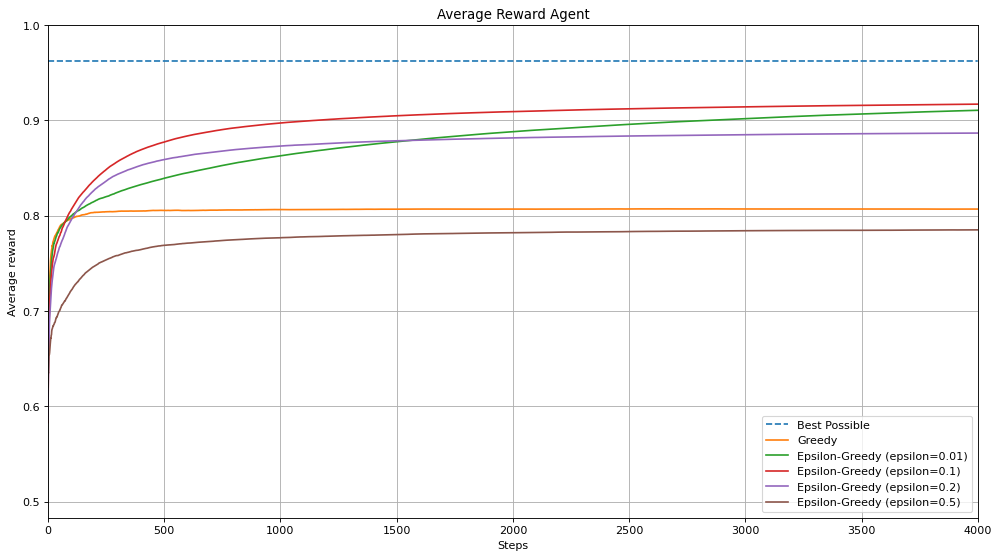

In [344]:
epsilon_values = [0.01, 0.1, 0.2, 0.5]  # Epsilon values for epsilon-greedy algorithm
average_rewards =[]
# Run the experiment for each epsilon value
average_rewards.append(simulate(n_runs, n_steps, n_arms, true_values, method="greedy", epsilon=None, val=val))

# Run the experiment for each epsilon value
for epsilon in epsilon_values:
    average_rewards.append(simulate(n_runs, n_steps, n_arms, true_values, method="epsilon", epsilon=epsilon, val=val))
    
# Plot the average rewards for greedy and epsilon-greedy algorithms
plot_average_rewards(average_rewards,["Greedy"] + [f"Epsilon-Greedy (epsilon={epsilon})" for epsilon in epsilon_values], 
                     np.max(true_values),n_steps)

### Comparing Epsilon-Greedy and UCB

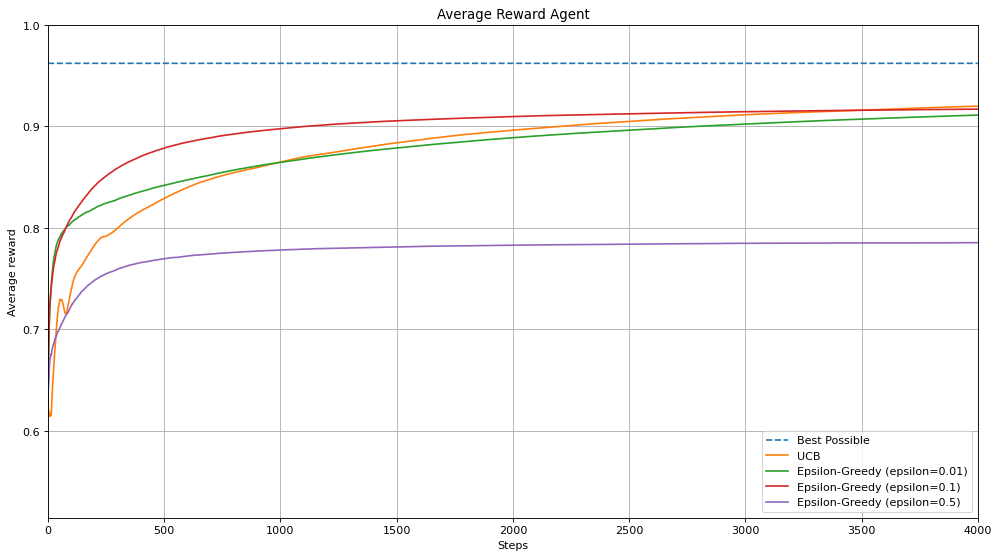

In [345]:
epsilon_values = [0.01, 0.1, 0.5]  # Epsilon values for epsilon-greedy algorithm
average_rewards =[]
# Run the experiment for each epsilon value
average_rewards.append(simulate(n_runs, n_steps, n_arms, true_values, method="UCB", epsilon=None, val=val))

# Run the experiment for each epsilon value
for epsilon in epsilon_values:
    average_rewards.append(simulate(n_runs, n_steps, n_arms, true_values, method="epsilon", epsilon=epsilon, val=val))
    
# Plot the average rewards for greedy and epsilon-greedy algorithms
plot_average_rewards(average_rewards,["UCB"] + [f"Epsilon-Greedy (epsilon={epsilon})" for epsilon in epsilon_values], 
                     np.max(true_values),n_steps)